- batch size 越大，相应地 learning rate 也越大
    - When the minibatch size is multiplied by k, multiply the learning rate by k.
        - https://arxiv.org/pdf/1706.02677.pdf

In [4]:
from tqdm.notebook import tqdm

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Creating a synthetic dataset for a simple regression problem
X = np.random.rand(1000, 10)
y = np.dot(X, np.random.rand(10, 1)) + np.random.rand(1000, 1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Defining a simple neural network model for the regression task
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
# Training configurations
batch_sizes = [16, 32, 64, 128, 256]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 50

# Dictionary to store training results
results = {}

In [6]:
# Training the model with different batch sizes and learning rates
for batch_size in tqdm(batch_sizes):
    for lr in tqdm(learning_rates):
        # Create a new instance of the model
        model = SimpleNN(X.shape[1])
        
        # Compile the model with the current learning rate
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        # Dataset loader
        dataset = torch.utils.data.TensorDataset(X, y)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        # Train the model
        model.train()
        for epoch in range(epochs):
            for data, target in dataloader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
        
        # Store the training results
        results[(batch_size, lr)] = loss.item()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

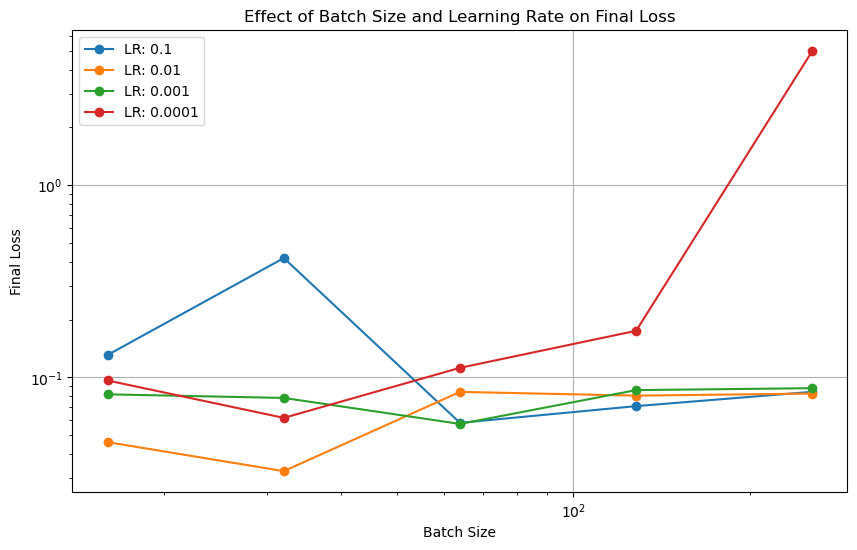

In [7]:
# Converting results to a more plot-friendly format
plot_data = {f'LR: {lr}': [results[(bs, lr)] for bs in batch_sizes] for lr in learning_rates}

# Plotting the results
plt.figure(figsize=(10, 6))
for lr, losses in plot_data.items():
    plt.plot(batch_sizes, losses, marker='o', label=lr)

plt.title('Effect of Batch Size and Learning Rate on Final Loss')
plt.xlabel('Batch Size')
plt.ylabel('Final Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()